In [69]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import random

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [70]:
meta_data = unpickle('/Users/diego/Scripts/cifar-100-challenge/cifar-100-python/meta')
test_data = unpickle('/Users/diego/Scripts/cifar-100-challenge/cifar-100-python/test')
train_data = unpickle('/Users/diego/Scripts/cifar-100-challenge/cifar-100-python/train')


In [71]:
fine_label_names = meta_data[b'fine_label_names']
print("Number of Labels: ", len(fine_label_names))
coarse_label_names = meta_data[b'coarse_label_names']
print("Number of Corase Labels: ", len(coarse_label_names))

Number of Labels:  100
Number of Corase Labels:  20


In [72]:
raw_test_data = test_data[b'data']
test_labels = test_data[b'fine_labels']
print("Test Raw Image Data Shape: ", raw_test_data.shape)
print("Test Labels Shape: ", len(test_labels))

Test Raw Image Data Shape:  (10000, 3072)
Test Labels Shape:  10000


In [73]:
raw_train_data = train_data[b'data']
train_labels = train_data[b'fine_labels']
print("Raw Training Data Shape: ", raw_train_data.shape)
print("Train Labels Shape", len(train_labels))

Raw Training Data Shape:  (50000, 3072)
Train Labels Shape 50000


In [74]:
label_from_index = lambda index : fine_label_names[index]
index_from_label = lambda label : fine_label_names.index(label)

In [75]:
raw_test_data = raw_test_data.reshape(raw_test_data.shape[0], 3, 32, 32)
raw_test_data = raw_test_data.transpose(0, 2, 3, 1).astype('uint8')
raw_train_data = raw_train_data.reshape(raw_train_data.shape[0], 3, 32, 32)
raw_train_data = raw_train_data.transpose(0, 2, 3, 1).astype('uint8')

In [76]:
raw_test_data = torch.from_numpy(raw_test_data)
raw_train_data = torch.from_numpy(raw_train_data)

torch.Size([32, 32, 3])
Label :  b'boy'


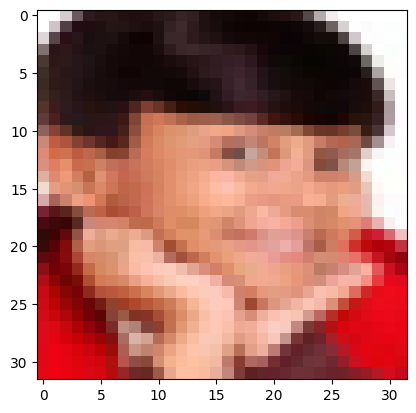

In [217]:
index = random.randint(0, raw_test_data.shape[0])
print(raw_test_data[index].shape)
print("Label : ", label_from_index(test_labels[index]))
imgplot = plt.imshow(raw_test_data[index])